In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from wwo_hist import retrieve_hist_data
import os
#import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
#import imblearn
import datetime
from sklearn import preprocessing
from scipy import stats

# Featuretools
# import featuretools as ft

#bikeday = pd.read_csv('day.csv')
bikehour = pd.read_csv('hour.csv')

In [33]:
frequency=1
start_date = '01-JAN-2011'
end_date = '31-DEC-2012'
api_key = 'dd1280dbb4ac487881f170502210602'
location_list = ['washington']

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for washington


Currently retrieving data for washington: from 2011-01-01 to 2011-01-31
Time elapsed (hh:mm:ss.ms) 0:00:02.316276
Currently retrieving data for washington: from 2011-02-01 to 2011-02-28
Time elapsed (hh:mm:ss.ms) 0:00:04.656930
Currently retrieving data for washington: from 2011-03-01 to 2011-03-31
Time elapsed (hh:mm:ss.ms) 0:00:07.093159
Currently retrieving data for washington: from 2011-04-01 to 2011-04-30
Time elapsed (hh:mm:ss.ms) 0:00:09.291668
Currently retrieving data for washington: from 2011-05-01 to 2011-05-31
Time elapsed (hh:mm:ss.ms) 0:00:11.489399
Currently retrieving data for washington: from 2011-06-01 to 2011-06-30
Time elapsed (hh:mm:ss.ms) 0:00:13.833997
Currently retrieving data for washington: from 2011-07-01 to 2011-07-31
Time elapsed (hh:mm:ss.ms) 0:00:16.619473
Currently retrieving data for washington: from 2011-08-01 to 2011-08-31
Time elapsed (hh:mm:ss.ms) 0:00:18.588931
Currently retrieving data for washington: fro

In [2]:
washdf = pd.read_csv("washington.csv")

In [3]:
washdf['date_time'] = washdf['date_time'].astype('datetime64')

In [69]:
washdf.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,19.209302,9.917921,0.075923,10.520383,4.268126,46.119015,9.909770,13.522401,14.955084,12.870098,16.692886,33.204742,77.277759,0.145246,1016.455198,14.155723,8.823244,203.832421,10.545372
std,9.921655,8.484481,0.917762,3.188889,1.849905,31.364056,9.395611,11.913000,10.584951,10.974438,8.558077,31.516748,15.556330,0.686161,7.460958,9.508429,2.484368,91.768953,5.340121
min,-3.000000,-9.000000,0.000000,3.500000,1.000000,0.000000,-19.000000,-16.000000,-9.000000,-16.000000,0.000000,0.000000,30.000000,0.000000,964.000000,-9.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,0.000000,8.700000,3.000000,18.000000,2.000000,4.000000,6.000000,4.000000,10.000000,7.000000,66.000000,0.000000,1012.000000,6.000000,9.000000,142.000000,7.000000
50%,20.000000,10.000000,0.000000,10.400000,4.000000,46.000000,11.000000,14.000000,15.000000,14.000000,15.000000,22.000000,79.000000,0.000000,1016.000000,15.000000,10.000000,203.500000,10.000000
75%,28.000000,18.000000,0.000000,13.400000,6.000000,73.000000,18.000000,22.000000,24.000000,22.000000,21.000000,54.000000,91.000000,0.000000,1021.000000,22.000000,10.000000,288.000000,13.000000
max,40.000000,27.000000,20.300000,14.500000,9.000000,100.000000,29.000000,54.000000,54.000000,40.000000,74.000000,100.000000,100.000000,26.400000,1038.000000,40.000000,10.000000,360.000000,52.000000


In [76]:
wash_sel_df = washdf[['date_time', 'totalSnow_cm', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'visibility']]

In [77]:
wash_sel_df.dtypes

date_time       datetime64[ns]
totalSnow_cm           float64
WindGustKmph             int64
cloudcover               int64
humidity                 int64
precipMM               float64
visibility               int64
dtype: object

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

#scaled_values = scaler.fit_transform(wash_sel_df) 
#wash_sel_df.loc[:,:] = scaled_values

column_names_to_normalize = ['totalSnow_cm', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'visibility']
x = wash_sel_df[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
wash_norm = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = wash_sel_df.index)
wash_sel_df[column_names_to_normalize] = wash_norm

In [83]:
wash_norm.describe()

,totalSnow_cm,WindGustKmph,cloudcover,humidity,precipMM,visibility
count,17544.00000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,0.00374,0.225580,0.332047,0.675397,0.005502,0.882324
std,0.04521,0.115650,0.315167,0.222233,0.025991,0.248437
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.135135,0.070000,0.514286,0.000000,0.900000
50%,0.00000,0.202703,0.220000,0.700000,0.000000,1.000000
75%,0.00000,0.283784,0.540000,0.871429,0.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
wash_norm.dtypes

totalSnow_cm    float64
WindGustKmph    float64
cloudcover      float64
humidity        float64
precipMM        float64
visibility      float64
dtype: object

In [82]:
wash_sel_df.describe()

,totalSnow_cm,WindGustKmph,cloudcover,humidity,precipMM,visibility
count,17544.00000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,0.00374,0.225580,0.332047,0.675397,0.005502,0.882324
std,0.04521,0.115650,0.315167,0.222233,0.025991,0.248437
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.135135,0.070000,0.514286,0.000000,0.900000
50%,0.00000,0.202703,0.220000,0.700000,0.000000,1.000000
75%,0.00000,0.283784,0.540000,0.871429,0.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
wash_sel_df

,date_time,totalSnow_cm,WindGustKmph,cloudcover,humidity,precipMM,visibility
0,2011-01-01 00:00:00,0.0,0.148649,1.00,0.985714,0.000000,0.0
1,2011-01-01 01:00:00,0.0,0.189189,1.00,0.985714,0.000000,0.0
2,2011-01-01 02:00:00,0.0,0.229730,1.00,0.985714,0.000000,0.0
3,2011-01-01 03:00:00,0.0,0.283784,1.00,0.985714,0.000000,0.0
4,2011-01-01 04:00:00,0.0,0.256757,0.89,0.985714,0.000000,0.3
...,...,...,...,...,...,...,...
17539,2012-12-31 19:00:00,0.0,0.283784,0.51,0.671429,0.003788,0.7
17540,2012-12-31 20:00:00,0.0,0.324324,0.43,0.685714,0.000000,0.8
17541,2012-12-31 21:00:00,0.0,0.351351,0.35,0.685714,0.000000,1.0
17542,2012-12-31 22:00:00,0.0,0.297297,0.29,0.685714,0.000000,1.0


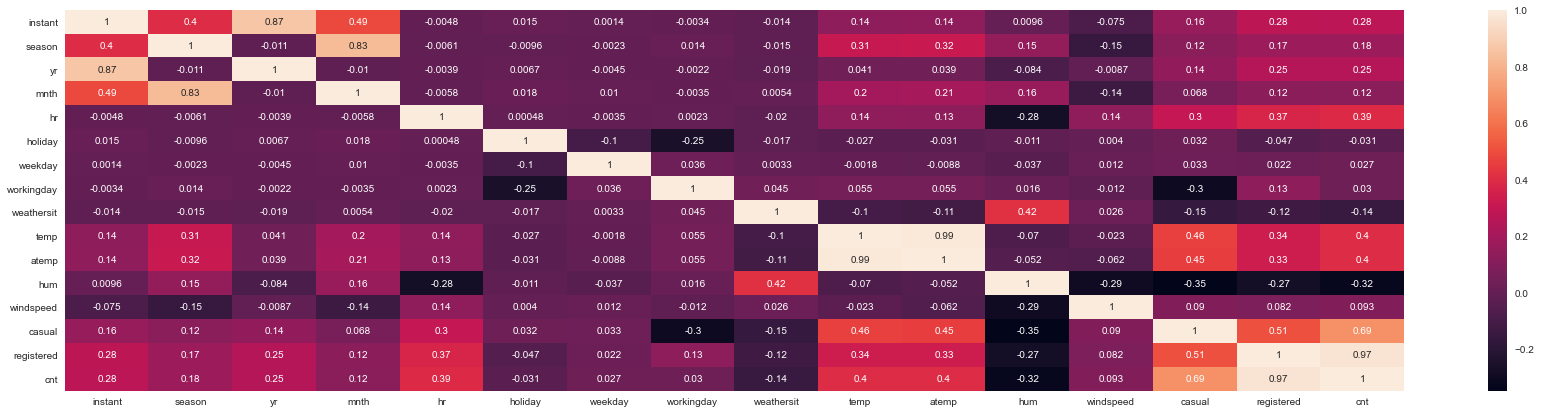

In [28]:
correlation_mat_orig = bikehour.corr()
plt.figure(figsize=(30,7))
sns.heatmap(correlation_mat_orig, annot = True)
#plt.savefig("correlation.png")
plt.show()

In [4]:
# Do the conversion and renaming, expanding of feature set here
# - instant: record index
# - dteday : date
# - season : season (1:winter, 2:spring, 3:summer, 4:fall)
# - mnth : month ( 1 to 12)
# - yr : year (0: 2011, 1:2012)
# wwekday : SUNDAY is 0, SATURDAY is 6
# workingday : if day is neither weekend nor holiday is 1, otherwise is 0
# weathersit :
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
# - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
# - hum: Normalized humidity. The values are divided to 100 (max)
# - windspeed: Normalized wind speed. The values are divided to 67 (max) ???

# "De-normalize"
# Denormalized = ($normalizedValue * ($max-$min) + $min)

hdf = bikehour.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'workingday': 'is_workday', 'hum': 'humidity', 'cnt': 'users_total', 'holiday': 'is_holiday', 'atemp': 'felt_temperature', 'temp': 'temperature', 'weathersit': 'weather', 'casual': 'casual_users', 'registered': 'registered_users'})
#ddf = bikeday.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'workingday': 'is_workday', 'hum': 'humidity', 'cnt': 'users_total', 'holiday': 'is_holiday', 'atemp': 'felt_temperature', 'temp': 'temperature', 'weathersit': 'weather', 'casual': 'casual_users', 'registered': 'registered_users'})

In [5]:
hdf['season'] = hdf['season'].replace([1, 2, 3, 4], ['winter', 'spring', 'summer', 'fall'])
hdf['year'] = hdf['year'].replace([0, 1], [2011, 2012])
hdf['weekday'] = hdf['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
hdf['month'] = hdf['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
hdf['weather'] = hdf['weather'].replace([1, 2, 3, 4], ['A', 'B', 'C', 'D'])
hdf['is_holiday'] = hdf['is_holiday'].replace([1, 0], [True, False])
hdf['is_workday'] = hdf['is_workday'].replace([1, 0], [True, False])

#ddf['season'] = ddf['season'].replace([1, 2, 3, 4], ['winter', 'sprin4g', 'summer', 'fall'])
#ddf['year'] = ddf['year'].replace([0, 1], [2011, 2012])
#ddf['weekday'] = ddf['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
#ddf['month'] = ddf['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
#ddf['weather'] = hdf['weather'].replace([1, 2, 3, 4], ['A', 'B', 'C', 'D'])
#ddf['is_holiday'] = hdf['is_holiday'].replace([1, 0], [True, False])
#ddf['is_workday'] = hdf['is_workday'].replace([1, 0], [True, False])

In [39]:
hdf.head()

,instant,date,season,year,month,hour,is_holiday,weekday,is_workday,weather,temperature,felt_temperature,humidity,windspeed,casual_users,registered_users,users_total
0,1,2011-01-01,winter,2011,January,0,False,Saturday,False,A,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,2011,January,1,False,Saturday,False,A,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,2011,January,2,False,Saturday,False,A,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,2011,January,3,False,Saturday,False,A,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,2011,January,4,False,Saturday,False,A,0.24,0.2879,0.75,0.0,0,1,1


<AxesSubplot:>

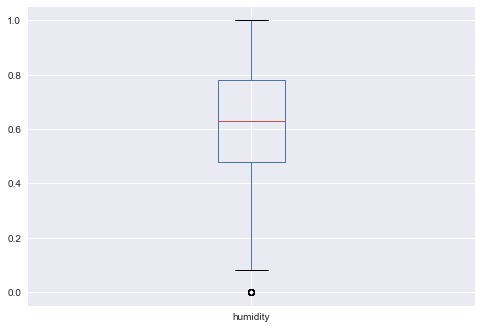

In [6]:
hdf.humidity.plot.box()

In [7]:
#hdf['date'] = pd.to_datetime(hdf['date'])
#ddf['date'] = pd.to_datetime(ddf['date'])
hdf['date'] = hdf['date'].astype('datetime64')
#ddf['date'] = ddf['date'].astype('datetime64')
# We could even have converted the - then dteday - column to datetime while readingthe .csv file by adding , parse_dates=['dteday'])
# bikeday = pd.read_csv('day.csv'), parse_dates=['dteday'])
# bikehour = pd.read_csv('hour.csv'), parse_dates=['dteday'])

In [8]:
hdf['date_time'] = pd.to_datetime(hdf.date) + pd.to_timedelta(hdf.hour, unit='h')

In [9]:
hdf['is_weekend'] = np.where((hdf['weekday'] == 'Saturday') | (hdf['weekday'] == 'Sunday'), True, False)
#ddf['is_weekend'] = np.where((ddf['weekday'] == 'Saturday') | (ddf['weekday'] == 'Sunday'), True, False)

In [87]:
capital_df = pd.merge(hdf, wash_sel_df, on='date_time')

In [12]:
pd.set_option("max_columns", 40)

In [91]:
capital_df.drop(columns=['date_time', 'humidity_x'])

,instant,date,season,year,month,hour,is_holiday,weekday,is_workday,weather,temperature,felt_temperature,windspeed,casual_users,registered_users,users_total,is_weekend,totalSnow_cm,WindGustKmph,cloudcover,humidity_y,precipMM,visibility
0,1,2011-01-01,winter,2011,January,0,False,Saturday,False,A,0.24,0.2879,0.0000,3,13,16,True,0.0,0.148649,1.00,0.985714,0.000000,0.0
1,2,2011-01-01,winter,2011,January,1,False,Saturday,False,A,0.22,0.2727,0.0000,8,32,40,True,0.0,0.189189,1.00,0.985714,0.000000,0.0
2,3,2011-01-01,winter,2011,January,2,False,Saturday,False,A,0.22,0.2727,0.0000,5,27,32,True,0.0,0.229730,1.00,0.985714,0.000000,0.0
3,4,2011-01-01,winter,2011,January,3,False,Saturday,False,A,0.24,0.2879,0.0000,3,10,13,True,0.0,0.283784,1.00,0.985714,0.000000,0.0
4,5,2011-01-01,winter,2011,January,4,False,Saturday,False,A,0.24,0.2879,0.0000,0,1,1,True,0.0,0.256757,0.89,0.985714,0.000000,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,December,19,False,Monday,True,B,0.26,0.2576,0.1642,11,108,119,False,0.0,0.283784,0.51,0.671429,0.003788,0.7
17375,17376,2012-12-31,winter,2012,December,20,False,Monday,True,B,0.26,0.2576,0.1642,8,81,89,False,0.0,0.324324,0.43,0.685714,0.000000,0.8
17376,17377,2012-12-31,winter,2012,December,21,False,Monday,True,A,0.26,0.2576,0.1642,7,83,90,False,0.0,0.351351,0.35,0.685714,0.000000,1.0
17377,17378,2012-12-31,winter,2012,December,22,False,Monday,True,A,0.26,0.2727,0.1343,13,48,61,False,0.0,0.297297,0.29,0.685714,0.000000,1.0


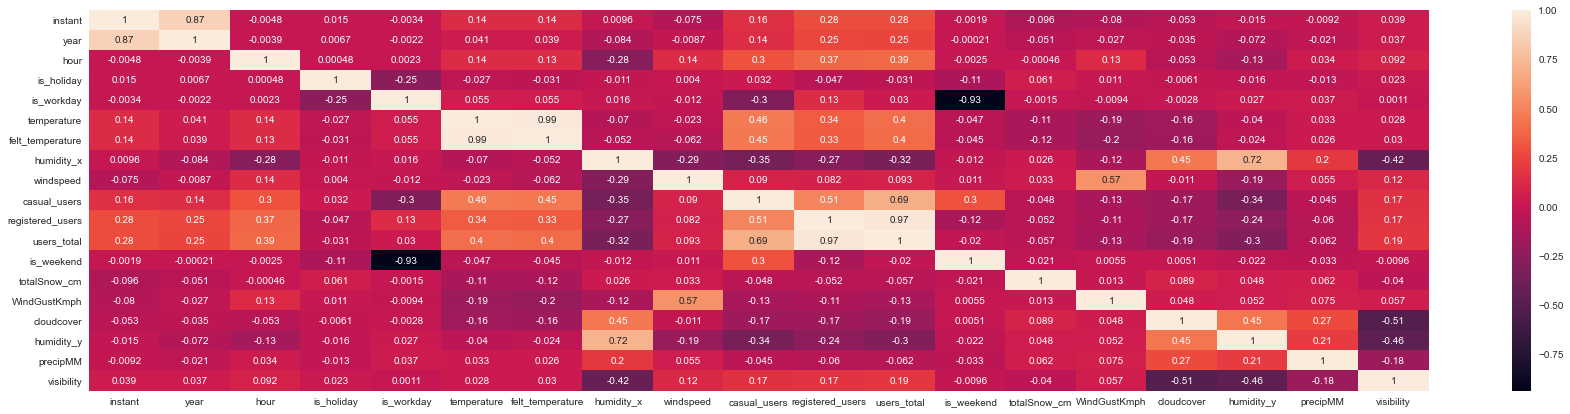

In [92]:
corr_mat = capital_df.corr()
plt.figure(figsize=(30,7))
sns.heatmap(corr_mat, annot = True)
#plt.savefig("correlation.png")
plt.show()

In [43]:
#hdf_ordered = hdf[['instant', 'date', 'year', 'month', 'hour', 'weekday', 'is_workday', 'is_weekend', 'is_holiday', 'season', 'weather', 'temperature', 'felt_temperature', 'humidity', 'windspeed', 'casual_users', 'registered_users', 'users_total']]

In [14]:
min_max_scaler_temp = preprocessing.MinMaxScaler(feature_range=(-8, 39))
X_temp = hdf[['temperature']]
temp_denorm = min_max_scaler_temp.fit_transform(X_temp)

min_max_scaler_temp = preprocessing.MinMaxScaler(feature_range=(-8, 39))
X_ftemp = hdf[['felt_temperature']]
ftemp_denorm = min_max_scaler_temp.fit_transform(X_ftemp)

# max value in hdf for humidity is 0.9725. 100 is max in new scale
min_max_scaler_hum = preprocessing.MinMaxScaler(feature_range=(0, 100))
X_hum = hdf[['humidity']]
hum_denorm = min_max_scaler_hum.fit_transform(X_hum)

min_max_scaler_wspeed = preprocessing.MinMaxScaler(feature_range=(0, 56.9969))
X_wspeed = hdf[['windspeed']]
wspeed_denorm = min_max_scaler_wspeed.fit_transform(X_wspeed)

temperature_actual = pd.DataFrame(data=temp_denorm, columns=['temperature_actual'])
felt_temperature_actual = pd.DataFrame(data=ftemp_denorm, columns=['felt_temperature_actual'])
humidity_actual = pd.DataFrame(data=hum_denorm, columns=['humidity_actual'])
windspeed_actual = pd.DataFrame(data=wspeed_denorm, columns=['windspeed_actual'])

hdf_denorm = pd.concat([hdf, temperature_actual, felt_temperature_actual, humidity_actual, windspeed_actual], axis=1)

In [48]:
capital_df = pd.merge(hdf_denorm, washdf, on='date_time')

In [55]:
df_test

,instant,date,season,year,month,hour,is_holiday,weekday,is_workday,weather,temperature,felt_temperature,windspeed,casual_users,registered_users,users_total,is_weekend,temperature_actual,felt_temperature_actual,windspeed_actual,totalSnow_cm,WindGustKmph,cloudcover,humidity_y,precipMM,visibility
0,1,2011-01-01,winter,2011,January,0,False,Saturday,False,A,0.24,0.2879,0.0000,3,13,16,True,2.551020,5.5313,0.0000,0.0,11,100,99,0.0,0
1,2,2011-01-01,winter,2011,January,1,False,Saturday,False,A,0.22,0.2727,0.0000,8,32,40,True,1.591837,4.8169,0.0000,0.0,14,100,99,0.0,0
2,3,2011-01-01,winter,2011,January,2,False,Saturday,False,A,0.22,0.2727,0.0000,5,27,32,True,1.591837,4.8169,0.0000,0.0,17,100,99,0.0,0
3,4,2011-01-01,winter,2011,January,3,False,Saturday,False,A,0.24,0.2879,0.0000,3,10,13,True,2.551020,5.5313,0.0000,0.0,21,100,99,0.0,0
4,5,2011-01-01,winter,2011,January,4,False,Saturday,False,A,0.24,0.2879,0.0000,0,1,1,True,2.551020,5.5313,0.0000,0.0,19,89,99,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,December,19,False,Monday,True,B,0.26,0.2576,0.1642,11,108,119,False,3.510204,4.1072,11.0014,0.0,21,51,77,0.1,7
17375,17376,2012-12-31,winter,2012,December,20,False,Monday,True,B,0.26,0.2576,0.1642,8,81,89,False,3.510204,4.1072,11.0014,0.0,24,43,78,0.0,8
17376,17377,2012-12-31,winter,2012,December,21,False,Monday,True,A,0.26,0.2576,0.1642,7,83,90,False,3.510204,4.1072,11.0014,0.0,26,35,78,0.0,10
17377,17378,2012-12-31,winter,2012,December,22,False,Monday,True,A,0.26,0.2727,0.1343,13,48,61,False,3.510204,4.8169,8.9981,0.0,22,29,78,0.0,10


In [50]:
capital_df.loc[capital_df['totalSnow_cm'] <= 0.10]

,instant,date,season,year,month,hour,is_holiday,weekday,is_workday,weather,temperature,felt_temperature,humidity_x,windspeed,casual_users,registered_users,users_total,date_time,is_weekend,temperature_actual,...,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity_y,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,1,2011-01-01,winter,2011,January,0,False,Saturday,False,A,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00,True,2.551020,...,2,15,04:58 AM,02:31 PM,07:27 AM,04:57 PM,3,0,3,0,11,100,99,0.0,1022,3,0,207,5,washington
1,2,2011-01-01,winter,2011,January,1,False,Saturday,False,A,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00,True,1.591837,...,2,15,04:58 AM,02:31 PM,07:27 AM,04:57 PM,3,0,3,0,14,100,99,0.0,1022,3,0,202,7,washington
2,3,2011-01-01,winter,2011,January,2,False,Saturday,False,A,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00,True,1.591837,...,2,15,04:58 AM,02:31 PM,07:27 AM,04:57 PM,2,0,3,0,17,100,99,0.0,1021,3,0,196,9,washington
3,4,2011-01-01,winter,2011,January,3,False,Saturday,False,A,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00,True,2.551020,...,2,15,04:58 AM,02:31 PM,07:27 AM,04:57 PM,2,-1,2,-1,21,100,99,0.0,1021,2,0,191,10,washington
4,5,2011-01-01,winter,2011,January,4,False,Saturday,False,A,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00,True,2.551020,...,2,15,04:58 AM,02:31 PM,07:27 AM,04:57 PM,2,-1,2,-1,19,89,99,0.0,1021,2,3,187,9,washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,December,19,False,Monday,True,B,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00,False,3.510204,...,2,78,08:23 PM,09:09 AM,07:27 AM,04:56 PM,-1,-2,2,-2,21,51,77,0.1,1018,2,7,228,11,washington
17375,17376,2012-12-31,winter,2012,December,20,False,Monday,True,B,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00,False,3.510204,...,2,78,08:23 PM,09:09 AM,07:27 AM,04:56 PM,-1,-1,2,-1,24,43,78,0.0,1018,2,8,239,12,washington
17376,17377,2012-12-31,winter,2012,December,21,False,Monday,True,A,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00,False,3.510204,...,2,78,08:23 PM,09:09 AM,07:27 AM,04:56 PM,-1,-1,3,-1,26,35,78,0.0,1017,2,10,250,13,washington
17377,17378,2012-12-31,winter,2012,December,22,False,Monday,True,A,0.26,0.2727,0.56,0.1343,13,48,61,2012-12-31 22:00:00,False,3.510204,...,2,78,08:23 PM,09:09 AM,07:27 AM,04:56 PM,-1,-1,3,-1,22,29,78,0.0,1017,2,10,249,11,washington


In [51]:
df_test = capital_df.drop(columns=['location', 'moonrise', 'moonset', 'uvIndex', 'DewPointC', 'pressure', 'sunset', 'sunrise', 'maxtempC', 'mintempC', 'winddirDegree'])

In [52]:
df_test = df_test.drop(columns=['humidity_actual', 'humidity_x', 'date_time'])

In [53]:
df_test = df_test.drop(columns=['windspeedKmph', 'tempC', 'WindChillC', 'HeatIndexC', 'FeelsLikeC', 'moon_illumination', 'sunHour'])

In [62]:
df_test = df_test.drop(columns=['temperature_actual', 'felt_temperature_actual', 'windspeed_actual'])

In [65]:
df_test = df_test.rename(columns={'humidity_y': 'humidity'})

In [66]:
df_test.describe()

,instant,year,hour,temperature,felt_temperature,windspeed,casual_users,registered_users,users_total,totalSnow_cm,WindGustKmph,cloudcover,humidity,precipMM,visibility
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2011.502561,11.546752,0.496987,0.475775,0.190098,35.676218,153.786869,189.463088,0.062190,16.577709,32.919385,77.144657,0.128414,8.835088
std,5017.0295,0.500008,6.914405,0.192556,0.171850,0.122340,49.305030,151.357286,181.387599,0.779801,8.385197,31.316203,15.544853,0.556194,2.479997
min,1.0000,2011.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
25%,4345.5000,2011.000000,6.000000,0.340000,0.333300,0.104500,4.000000,34.000000,40.000000,0.000000,10.000000,7.000000,66.000000,0.000000,9.000000
50%,8690.0000,2012.000000,12.000000,0.500000,0.484800,0.194000,17.000000,115.000000,142.000000,0.000000,15.000000,21.000000,79.000000,0.000000,10.000000
75%,13034.5000,2012.000000,18.000000,0.660000,0.621200,0.253700,48.000000,220.000000,281.000000,0.000000,21.000000,53.000000,91.000000,0.000000,10.000000
max,17379.0000,2012.000000,23.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,20.300000,72.000000,100.000000,100.000000,17.600000,10.000000


In [61]:
df_test.loc[(df_test['season'] == 'summer') & (df_test['totalSnow_cm'] > 0.0)]

,instant,date,season,year,month,hour,is_holiday,weekday,is_workday,weather,temperature,felt_temperature,windspeed,casual_users,registered_users,users_total,is_weekend,temperature_actual,felt_temperature_actual,windspeed_actual,totalSnow_cm,WindGustKmph,cloudcover,humidity_y,precipMM,visibility


In [56]:
washdf

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2011-01-01 00:00:00,11,2,0.0,3.5,2,15,04:58 AM,02:31 PM,07:27 AM,04:57 PM,3,0,3,0,11,100,99,0.0,1022,3,0,207,5,washington
1,2011-01-01 01:00:00,11,2,0.0,3.5,2,15,04:58 AM,02:31 PM,07:27 AM,04:57 PM,3,0,3,0,14,100,99,0.0,1022,3,0,202,7,washington
2,2011-01-01 02:00:00,11,2,0.0,3.5,2,15,04:58 AM,02:31 PM,07:27 AM,04:57 PM,2,0,3,0,17,100,99,0.0,1021,3,0,196,9,washington
3,2011-01-01 03:00:00,11,2,0.0,3.5,2,15,04:58 AM,02:31 PM,07:27 AM,04:57 PM,2,-1,2,-1,21,100,99,0.0,1021,2,0,191,10,washington
4,2011-01-01 04:00:00,11,2,0.0,3.5,2,15,04:58 AM,02:31 PM,07:27 AM,04:57 PM,2,-1,2,-1,19,89,99,0.0,1021,2,3,187,9,washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2012-12-31 19:00:00,5,-2,0.0,8.7,2,78,08:23 PM,09:09 AM,07:27 AM,04:56 PM,-1,-2,2,-2,21,51,77,0.1,1018,2,7,228,11,washington
17540,2012-12-31 20:00:00,5,-2,0.0,8.7,2,78,08:23 PM,09:09 AM,07:27 AM,04:56 PM,-1,-1,2,-1,24,43,78,0.0,1018,2,8,239,12,washington
17541,2012-12-31 21:00:00,5,-2,0.0,8.7,2,78,08:23 PM,09:09 AM,07:27 AM,04:56 PM,-1,-1,3,-1,26,35,78,0.0,1017,2,10,250,13,washington
17542,2012-12-31 22:00:00,5,-2,0.0,8.7,2,78,08:23 PM,09:09 AM,07:27 AM,04:56 PM,-1,-1,3,-1,22,29,78,0.0,1017,2,10,249,11,washington


In [8]:
hdf_features = hdf_ordered.iloc[:,:-3]
hdf_users = hdf_ordered.iloc[:,-1:]
# hdf_feature_names = hdf_features.columns

hdf_train_X, hdf_test_X, hdf_train_y, hdf_test_y = train_test_split(hdf_features, hdf_users, test_size=0.3, random_state=42)

In [9]:
hdf_train_X

,instant,date,year,month,hour,weekday,is_workday,is_weekend,is_holiday,season,weather,temperature,felt_temperature,humidity,windspeed
11229,11230,2012-04-18,2012,April,2,Wednesday,True,False,False,spring,B,0.50,0.4848,0.42,0.1940
6334,6335,2011-09-26,2011,September,12,Monday,True,False,False,fall,B,0.68,0.6364,0.79,0.1642
11060,11061,2012-04-11,2012,April,0,Wednesday,True,False,False,spring,A,0.34,0.3030,0.36,0.4179
12346,12347,2012-06-03,2012,June,15,Sunday,False,True,False,spring,A,0.70,0.6364,0.34,0.0000
15437,15438,2012-10-10,2012,October,10,Wednesday,True,False,False,fall,A,0.56,0.5303,0.52,0.2985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11285,2012-04-20,2012,April,9,Friday,True,False,False,spring,A,0.46,0.4545,0.88,0.0896
11964,11965,2012-05-18,2012,May,17,Friday,True,False,False,spring,A,0.66,0.6212,0.34,0.1343
5390,5391,2011-08-17,2011,August,12,Wednesday,True,False,False,summer,A,0.80,0.7273,0.43,0.2836
860,861,2011-02-08,2011,February,7,Tuesday,True,False,False,winter,A,0.24,0.1970,0.65,0.4179


In [10]:
hdf_train_y

,users_total
11229,9
6334,209
11060,30
12346,644
15437,217
...,...
11284,359
11964,812
5390,189
860,100


In [8]:
min_max_scaler_temp = preprocessing.MinMaxScaler(feature_range=(-8, 39))
X_temp = hdf[['temperature']]
temp_denorm = min_max_scaler_temp.fit_transform(X_temp)

min_max_scaler_temp = preprocessing.MinMaxScaler(feature_range=(-8, 39))
X_ftemp = hdf[['felt_temperature']]
ftemp_denorm = min_max_scaler_temp.fit_transform(X_ftemp)

# max value in hdf for humidity is 0.9725. 100 is max in new scale
min_max_scaler_hum = preprocessing.MinMaxScaler(feature_range=(0, 100))
X_hum = hdf[['humidity']]
hum_denorm = min_max_scaler_hum.fit_transform(X_hum)

# This is wrong! The highest value in the column is 0.850700 (and not 1. 1 would be equal to 67 on the new scale).  
# Could it be that simple? 0.850700 * 67 = 56.9969 
# The max for the daily dataset is 0.507463
#min_max_scaler_wspeed = preprocessing.MinMaxScaler(feature_range=(0, 67))
min_max_scaler_wspeed = preprocessing.MinMaxScaler(feature_range=(0, 56.9969))
X_wspeed = hdf[['windspeed']]
wspeed_denorm = min_max_scaler_wspeed.fit_transform(X_wspeed)
#---------------------------------------------------------
# And now for ddf: WORK IN PROGRESS! More values have to adjusted here
# min_max_scaler_temp = preprocessing.MinMaxScaler(feature_range=(-???, ???))
#X_temp_d = ddf[['temperature']]
#temp_denorm_d = min_max_scaler_temp.fit_transform(X_temp_d)

#X_ftemp_d = ddf[['felt_temperature']]
#ftemp_denorm_d = min_max_scaler_temp.fit_transform(X_ftemp_d)

# max value in hdf for humidity is 0.9725. 100 is max in new scale
#min_max_scaler_hum_d = preprocessing.MinMaxScaler(feature_range=(0, 97.25))
#X_hum_d = ddf[['humidity']]
#hum_denorm = min_max_scaler_hum.fit_transform(X_hum)

# This is wrong! The highest value in the column is 0.850700 (and not 1. 1 would be equal to 67 on the new scale).  
# Could it be that simple? 0.850700 * 67 = 56.9969 ASK!!!
# The max for the daily dataset is 0.507463
#min_max_scaler_wspeed = preprocessing.MinMaxScaler(feature_range=(0, 67))
#min_max_scaler_wspeed = preprocessing.MinMaxScaler(feature_range=(0, 56.9969))
#X_wspeed = hdf[['windspeed']]
#wspeed_denorm = min_max_scaler_wspeed.fit_transform(X_wspeed)

In [9]:
temperature_actual = pd.DataFrame(data=temp_denorm, columns=['temperature_actual'])
felt_temperature_actual = pd.DataFrame(data=ftemp_denorm, columns=['felt_temperature_actual'])
humidity_actual = pd.DataFrame(data=hum_denorm, columns=['humidity_actual'])
windspeed_actual = pd.DataFrame(data=wspeed_denorm, columns=['windspeed_actual'])

In [10]:
hdf_denorm = pd.concat([hdf, temperature_actual, felt_temperature_actual, humidity_actual, windspeed_actual], axis=1)

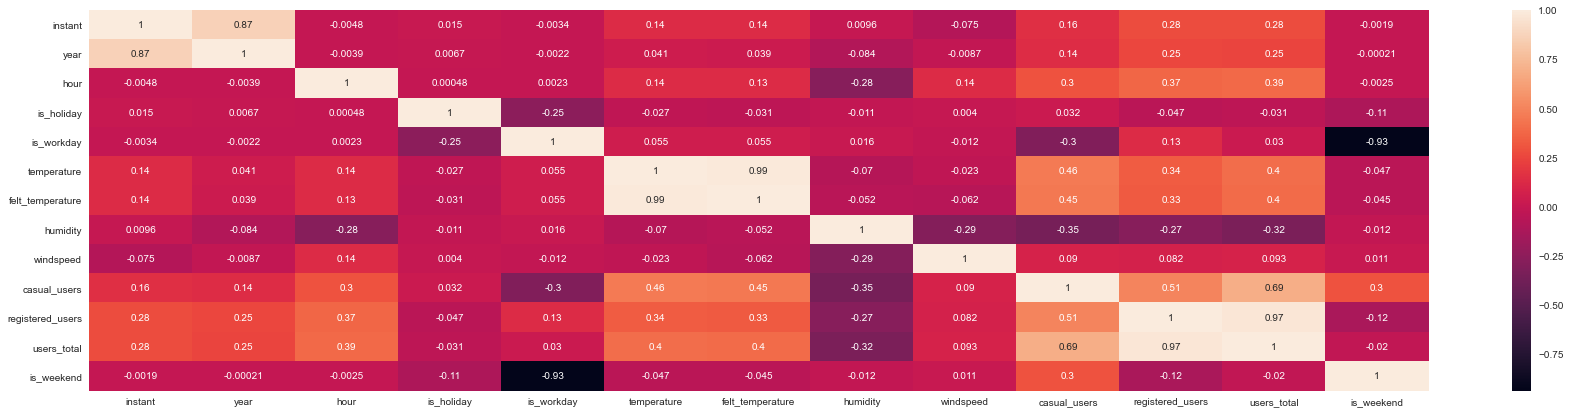

In [27]:
correlation_mat = hdf.corr()
plt.figure(figsize=(30,7))
sns.heatmap(correlation_mat, annot = True)
#plt.savefig("correlation.png")
plt.show()

In [91]:
## Identify and remove outliers
## sample example. (Reminder: The code snippets are just for giving you idea. You are encouraged to write the codes in your own way.)
## Also check out other features for outliers. Please consider using box plots to visualise outliers in such cases.

## Another issue with outliers is where to draw the line. It may not be clear where the outlier behavior starts. There are some people who arbitrarily eliminate a percentage at the tails (e.g. 5%), which makes no sense whatsoever.'

## But this is basically what we are doing below, right?
#q1 = hdf.total_count.quantile(0.25)
#q3 = hdf.total_count.quantile(0.75)
#iqr = q3 - q1
#lower_bound = q1 -(1.5 * iqr) 
#upper_bound = q3 +(1.5 * iqr) 
#hdf = hdf.loc[(hdf.total_count >= lower_bound) & (hdf.total_count <= upper_bound)]

In [12]:
## An alternative approach would be the transformation of the target values to a normal distribution and using mean and standard deviation.
# hdf = hdf[np.abs(hdf["userstotal"]-hdf["users_total"].mean()) <= 3*hdf["users_total"].std()]

KeyError: 'total_count'

In [ ]:
# Modelling
# Split the datasets into train and test.
# Select important features based on co-relation matrix.
# Check for categorical variables and apply one hot encoding.
# Look if any preprocessing is required
# MinMaxScaler might work better than Standard scaler sometimes.

# Apply and check cross_val_score on the data to check the best value of 'no of folds'. Often, analysts plot a graph for this which look like below:
# https://github.com/CodeAcademyBerlin/Data-Science/blob/master/Module%202/images/r2_cross_val.JPG

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.4, random_state=0)

# X_train.shape, y_train.shape

# X_test.shape, y_test.shape


# clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
# clf.score(X_test, y_test)
#-------------------------------------------
# from sklearn.model_selection import cross_val_score
# clf = svm.SVC(kernel='linear', C=1, random_state=42)
# scores = cross_val_score(clf, X, y, cv=5)
# scores

# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
#-----------------------------------
# from sklearn import preprocessing
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.4, random_state=0)
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_transformed = scaler.transform(X_train)
# clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
# X_test_transformed = scaler.transform(X_test)
# clf.score(X_test_transformed, y_test)

# A Pipeline makes it easier to compose estimators, providing this behavior under cross-validation:
# from sklearn.pipeline import make_pipeline
# clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
# cross_val_score(clf, X, y, cv=cv)

#------------------------------
# The cross_validate function differs from cross_val_score in two ways:
# It allows specifying multiple metrics for evaluation.
# It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

# from sklearn.model_selection import cross_validate
# from sklearn.metrics import recall_score
# scoring = ['precision_macro', 'recall_macro']
# clf = svm.SVC(kernel='linear', C=1, random_state=0)
# scores = cross_validate(clf, X, y, scoring=scoring)
# sorted(scores.keys())

# scores['test_recall_macro']

# K-fold Cross Validation
# import numpy as np
# from sklearn.model_selection import KFold

# X = ["a", "b", "c", "d"]
# kf = KFold(n_splits=2)
# for train, test in kf.split(X):
#     print("%s %s" % (train, test))

# Repeated K-fold
# import numpy as np
# from sklearn.model_selection import RepeatedKFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# random_state = 12883823
# rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
# for train, test in rkf.split(X):
#     print("%s %s" % (train, test))





In [15]:
# Hyperparameters
# estimator.get_params()

# GridSearchCV
# param_grid = [
# {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
# {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]

# HalvingGridSearchCV and HalvingRandomSearchCV
# Along with resource and min_resources, factor is the most important parameter to control the search in our implementation, though a value of 3 usually works well.
# # explicitly require this experimental feature
# from sklearn.experimental import enable_halving_search_cv  # noqa
# # now you can import normally from model_selection
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.model_selection import HalvingRandomSearchCV

# By default, the resource is defined in terms of number of samples. That is, each iteration will use an increasing amount of samples to train on. You can however manually specify a parameter to use as the resource with the resource parameter. Here is an example where the resource is defined in terms of the number of estimators of a random forest:

# from sklearn.datasets import make_classification
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.experimental import enable_halving_search_cv  # noqa
# from sklearn.model_selection import HalvingGridSearchCV
# import pandas as pd

# param_grid = {'max_depth': [3, 5, 10],
#               'min_samples_split': [2, 5, 10]}
# base_estimator = RandomForestClassifier(random_state=0)
# X, y = make_classification(n_samples=1000, random_state=0)
# sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
#                          factor=2, resource='n_estimators',
#                          max_resources=30).fit(X, y)
# sh.best_estimator_

# Note that it is not possible to budget on a parameter that is part of the parameter grid.
#----------------------------------------------------
# # In general, exhausting the total number of resources leads to a better final candidate parameter, and is slightly more time-intensive.
# from sklearn.datasets import make_classification
# from sklearn.svm import SVC
# from sklearn.experimental import enable_halving_search_cv  # noqa
# from sklearn.model_selection import HalvingGridSearchCV
# import pandas as pd
# param_grid= {'kernel': ('linear', 'rbf'),
#              'C': [1, 10, 100]}
# base_estimator = SVC(gamma='scale')
# X, y = make_classification(n_samples=1000)
# sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
#                          factor=2, min_resources=20).fit(X, y)
# sh.n_resources_

# #For HalvingGridSearchCV, by default, the min_resources parameter is set to ‘exhaust’. This means that min_resources is automatically set such that the last iteration can use as many resources as possible, within the max_resources limit:

# sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
#                          factor=2, min_resources='exhaust').fit(X, y)
# sh.n_resources_

# 3.2.3.6. Analysing results with the cv_results_ attribute
# The cv_results_ attribute contains useful information for analysing the results of a search. It can be converted to a pandas dataframe with df = pd.DataFrame(est.cv_results_). The cv_results_ attribute of HalvingGridSearchCV and HalvingRandomSearchCV is similar to that of GridSearchCV and RandomizedSearchCV, with additional information related to the successive halving process.

# Here is an example with some of the columns of a (truncated) dataframe:

# https://scikit-learn.org/stable/modules/grid_search.html#grid-search

# Each row corresponds to a given parameter combination (a candidate) and a given iteration. The iteration is given by the iter column. The n_resources column tells you how many resources were used.

# In the example above, the best parameter combination is {'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 10} since it has reached the last iteration (3) with the highest score: 0.96.



SyntaxError: invalid syntax (<ipython-input-15-043df12f228f>, line 57)

In [ ]:
## This is being left as an experiment for you to explore.
#X = train
#y= y.total_count.values.reshape(-1,1)

#lin_reg = linear_model.LinearRegression()

In [ ]:
## You can use the k-fold cross validation (specifically 10-fold) as shown in the following snippet.
# predicted = cross_val_predict(lin_reg, X, y, cv=10)

In [31]:
# You can also make it a function and pass arguments accordingly.
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models=[RandomForestRegressor(max_features= 'auto', n_estimators= 100, n_jobs= -1),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
rmse = []
d1= {}
d2 = {} 
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test, squared=False)))

d1={'Modelling Algo':model_names,'RMSLE':rmsle}   
d2={'Modelling Algo':model_names,'RMSE':rmse}   

rmsle_frame=pd.DataFrame(d1)
#rmsle_frame
rmse_frame=pd.DataFrame(d2)
#rmse_frame

sns.catplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',height=5,aspect=2);

NameError: name 'x_train' is not defined

In [ ]:
# RMSE
sns.catplot(y='Modelling Algo',x='RMSE',data=rmse_frame,kind='bar',height=5,aspect=2);

In [ ]:
# Google map EXAMPLE
%%html

<iframe src="https://www.google.com/maps/d/u/0/embed?mid=1xwOR-Mjborq-vmpGz-JfhucdlDlAmo1c" width="640" height="480"></iframe>

In [ ]:
# For example, top 10 start stations by volume of traffic. (number of occurances)
data2011['Start station'].value_counts()[0:10].plot(kind = 'bar');

In [103]:
# Time Series
# import datetime
df = pd.read_csv('202003-capitalbikeshare-tripdata.csv')
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])
df['End date'] - df['Start date']

0        0 days 00:26:36
1        0 days 00:07:28
2        0 days 00:04:43
3        0 days 00:10:42
4        0 days 00:05:47
               ...      
162525   0 days 00:11:14
162526   0 days 00:08:34
162527   0 days 00:25:25
162528   0 days 00:09:26
162529   0 days 00:17:35
Length: 162530, dtype: timedelta64[ns]

In [104]:
df.iloc[0:5]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
1,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
3,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
4,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member


In [73]:
df.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
1,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
3,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
4,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member


In [74]:
df.shape

(162530, 9)

In [75]:
type(df['Start date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [77]:
type(df['End date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [78]:
df.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
1,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
3,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
4,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member


In [79]:
df.index

RangeIndex(start=0, stop=162530, step=1)

In [105]:
df.index = df['Start date']

In [81]:
df.index

DatetimeIndex(['2020-03-01 00:01:16', '2020-03-01 00:02:04',
               '2020-03-01 00:03:45', '2020-03-01 00:05:49',
               '2020-03-01 00:06:53', '2020-03-01 00:10:26',
               '2020-03-01 00:14:30', '2020-03-01 00:15:17',
               '2020-03-01 00:16:20', '2020-03-01 00:17:39',
               ...
               '2020-03-31 22:59:36', '2020-03-31 23:02:31',
               '2020-03-31 23:03:29', '2020-03-31 23:08:10',
               '2020-03-31 23:14:43', '2020-03-31 23:17:58',
               '2020-03-31 23:18:13', '2020-03-31 23:29:00',
               '2020-03-31 23:41:17', '2020-03-31 23:45:05'],
              dtype='datetime64[ns]', name='Start date', length=162530, freq=None)

In [106]:
df['2020-03-01']['Duration']

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
                       ... 
2020-03-01 23:47:18     821
2020-03-01 23:49:41    1041
2020-03-01 23:51:25     704
2020-03-01 23:52:49     236
2020-03-01 23:58:59     487
Name: Duration, Length: 5322, dtype: int64

In [83]:
df['2020-03-17'][3456:3459]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
Start date,,,,,,,,,
2020-03-17 19:16:32,243,2020-03-17 19:16:32,2020-03-17 19:20:36,31294,7th & E St SW,31108,4th & M St SW,W21754,Member
2020-03-17 19:16:32,1032,2020-03-17 19:16:32,2020-03-17 19:33:45,31247,Jefferson Dr & 14th St SW,31120,10th & Florida Ave NW,W01468,Member
2020-03-17 19:16:38,775,2020-03-17 19:16:38,2020-03-17 19:29:33,31272,Washington & Independence Ave SW/HHS,31251,12th & L St NW,W23590,Member


In [84]:
sum(df['Start date'] >= df['End date'])

0

In [85]:
df['2020-03-12'][2001:2009]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
Start date,,,,,,,,,
2020-03-12 09:06:50,375,2020-03-12 09:06:50,2020-03-12 09:13:05,31130,7th & S St NW,31642,4th St & K St NW,W22303,Member
2020-03-12 09:06:53,728,2020-03-12 09:06:53,2020-03-12 09:19:01,31113,Columbia Rd & Belmont St NW,31216,14th St & New York Ave NW,W23806,Member
2020-03-12 09:06:55,961,2020-03-12 09:06:55,2020-03-12 09:22:57,31303,Tenleytown / Wisconsin Ave & Albemarle St NW,31121,Calvert St & Woodley Pl NW,W20455,Member
2020-03-12 09:06:59,587,2020-03-12 09:06:59,2020-03-12 09:16:47,31244,4th & E St SW,31230,Metro Center / 12th & G St NW,W23546,Member
2020-03-12 09:07:06,717,2020-03-12 09:07:06,2020-03-12 09:19:03,31268,12th & U St NW,31655,New Jersey Ave & F St NW,W21093,Member
2020-03-12 09:07:09,574,2020-03-12 09:07:09,2020-03-12 09:16:43,31218,L'Enfant Plaza / 7th & C St SW,31238,14th & G St NW,W22263,Member
2020-03-12 09:07:17,301,2020-03-12 09:07:17,2020-03-12 09:12:18,31618,4th & East Capitol St NE,31623,Columbus Circle / Union Station,W20559,Member
2020-03-12 09:07:36,959,2020-03-12 09:07:36,2020-03-12 09:23:35,31118,3rd & Elm St NW,31621,4th & D St NW / Judiciary Square,W23077,Member


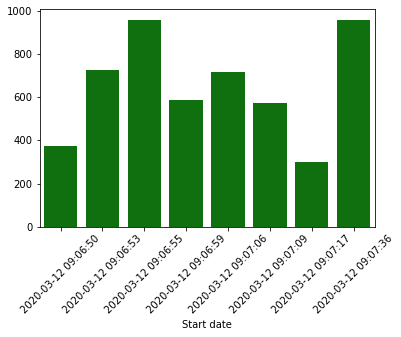

In [127]:
import matplotlib.pyplot as plt
ax = sns.barplot( x = df['2020-03-12']['Duration'][2001:2009].index, y = df['2020-03-12']['Duration'][2001:2009].values, color = 'green')

for item in ax.get_xticklabels():
    item.set_rotation(45)

In [108]:
df['2020-03-20']['Duration']

Start date
2020-03-20 00:01:03     784
2020-03-20 00:02:01     437
2020-03-20 00:07:23     600
2020-03-20 00:11:06     326
2020-03-20 00:12:22     350
                       ... 
2020-03-20 23:55:48    2702
2020-03-20 23:56:04    3217
2020-03-20 23:56:15    3210
2020-03-20 23:57:41    7447
2020-03-20 23:57:46    7571
Name: Duration, Length: 4809, dtype: int64

<AxesSubplot:xlabel='Start date'>

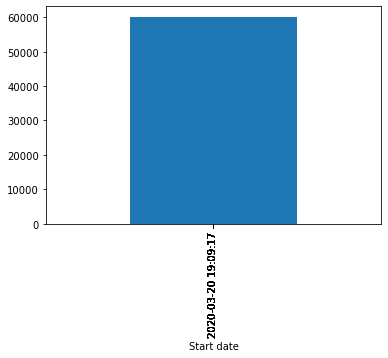

In [87]:
df['2020-03-20']['Duration'][4008:4020].plot(kind = 'bar')

In [88]:
df['2020-03-18'].shape

(3819, 9)

In [89]:
df['2020-03-18'].shape[0]

3819

In [90]:
df['2020-03-07']['Duration'].sum() / df['2020-03-07']['Duration'].shape[0] 

1065.615372194413

In [91]:
df['2020-03-07']['Duration'].sum() / df['2020-03-07']['Duration'].shape[0] / 60

17.760256203240218

In [92]:
trip_duration_per_trip = df['2020-03-07']['Duration'].sum() / df['2020-03-07']['Duration'].shape[0] / 60

In [93]:
trip_duration_per_trip

17.760256203240218

In [94]:
df['2020-03-07']['Duration'].sum()

6599356

In [95]:
trip_duration_per_trip_march = df['2020-03']['Duration'].sum() / df['2020-03']['Duration'].shape[0] / 60

In [96]:
trip_duration_per_trip_march

18.978877745646958

In [97]:
df

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
Start date,,,,,,,,,
2020-03-01 00:01:16,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
2020-03-01 00:02:04,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2020-03-01 00:03:45,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
2020-03-01 00:05:49,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
2020-03-01 00:06:53,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member
...,...,...,...,...,...,...,...,...,...
2020-03-31 23:17:58,673,2020-03-31 23:17:58,2020-03-31 23:29:12,31235,19th St & Constitution Ave NW,31265,5th St & Massachusetts Ave NW,W22920,Member
2020-03-31 23:18:13,514,2020-03-31 23:18:13,2020-03-31 23:26:47,31203,14th & Rhode Island Ave NW,31324,18th & New Hampshire Ave NW,21054,Member
2020-03-31 23:29:00,1524,2020-03-31 23:29:00,2020-03-31 23:54:25,31110,20th St & Florida Ave NW,31403,5th & Kennedy St NW,W24341,Member


In [12]:
df.index.time

NameError: name 'df' is not defined

In [ ]:
df1 = df

In [ ]:
df1.index = df1.index.time

In [ ]:
df1 = pd.Series(df1)

In [ ]:
df1

In [98]:
df = df['Duration']

In [99]:
df

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
                       ... 
2020-03-31 23:17:58     673
2020-03-31 23:18:13     514
2020-03-31 23:29:00    1524
2020-03-31 23:41:17     565
2020-03-31 23:45:05    1054
Name: Duration, Length: 162530, dtype: int64

In [100]:
df.loc['2020-03-01']

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
                       ... 
2020-03-01 23:47:18     821
2020-03-01 23:49:41    1041
2020-03-01 23:51:25     704
2020-03-01 23:52:49     236
2020-03-01 23:58:59     487
Name: Duration, Length: 5322, dtype: int64

In [101]:
df.iloc[0:5]

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
Name: Duration, dtype: int64

In [4]:
# JSON
df_json = pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/en/station_status.json')
df_json

,data,last_updated,ttl
stations,"[{'last_reported': 1611652631, 'eightd_has_ava...",1611731795,5


In [5]:
len(df_json.data['stations'])

621

In [6]:
df_json.data['stations'][1]['num_bikes_available']

1

<AxesSubplot:>

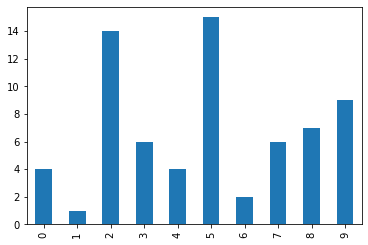

In [7]:
no_bikes = []
for i in range(len(df_json.data['stations'])):
    no_bikes.append(df_json.data['stations'][i]['num_bikes_available'])

pd.Series(no_bikes)[0:10].plot(kind='bar')